In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#　分散共分散行列の成分をもとに対角成分と回転角を導出
def var_normal(var_x, var_y, var_xy):
    sumab = var_x + var_y
    difab = np.sqrt((var_x - var_y) ** 2 + var_xy ** 2 * 4) * np.sign(var_xy)
    a = (sumab + difab) / 2
    b = (sumab - difab) / 2
    if difab == 0:
        cos = 0
        sin = 1
    else:
        cos = np.cos(np.arccos((var_x - var_y) / difab) / 2)
        sin = np.sin(np.arccos((var_x - var_y) / difab) / 2)
    return a,b,cos,sin

# 誤差円の描画

def graph_normal(ave_x, ave_y, a,b,cos,sin):
    line = np.arange(-1,1.0001,0.0001)
    x = line * np.sqrt(a)
    y = np.sqrt(1 - line ** 2) * np.sqrt(b)
    x_t = np.append(x * cos - y * sin , np.flipud(x * cos + y * sin)) + ave_x
    y_t = np.append(x * sin + y * cos , np.flipud(x * sin - y * cos)) + ave_y
    return x_t,y_t

#　二次元正規分布をギブスサンプリングする

def gibbs_normal(n, ave_x, ave_y, var_x, var_y, var_xy):
    x_lis = np.zeros(n * 2 + 1)
    y_lis = np.zeros(n * 2 + 1)
    x_lis[0] = np.random.rand() - 0.5 
    y_lis[0] = np.random.rand() - 0.5
    for i in range(n):
        x_lis[2 * i + 1] = ave_x + var_xy / var_y * (y_lis[2 * i] - ave_y) + np.random.randn() * np.sqrt((var_x * var_y - var_xy ** 2) / var_y)
        y_lis[2 * i + 1] = y_lis[2 * i]
        x_lis[2 * i + 2] = x_lis[2 * i + 1]
        y_lis[2 * i + 2] = ave_y + var_xy / var_x * (x_lis[2 * i + 1] - ave_x) + np.random.randn() * np.sqrt((var_x * var_y - var_xy ** 2) / var_x)
    return x_lis, y_lis

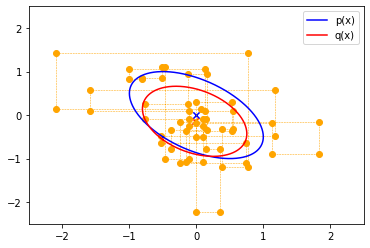

In [3]:
#分散
var_x = 1
var_y = 1
var_xy = -0.5
#平均
ave_x = 0
ave_y = 0
#乱数の生成数
n = 30

plt.xlim(ave_x - var_x * 2.5, ave_x + var_x * 2.5)
plt.ylim(ave_y - var_y * 2.5, ave_y + var_y * 2.5)

x_lis, y_lis = gibbs_normal(n, ave_x, ave_y, var_x, var_y, var_xy)
plt.plot(x_lis, y_lis, marker='o', linestyle="dashed", c = "orange",  linewidth=0.5)

a_t,b_t,cos_t,sin_t = var_normal(var_x, var_y, var_xy)
x_t, y_t = graph_normal(ave_x, ave_y, a_t,b_t,cos_t,sin_t)
plt.plot(x_t , y_t , c='blue',label="p(x)")
plt.scatter(ave_x , ave_y ,  marker='x', s=40, c='blue')

cov = np.cov(np.array([x_lis,y_lis]))
ave_xm = np.average(x_lis)
ave_ym = np.average(y_lis)
a,b,cos,sin = var_normal(cov[0,0], cov[1,1], cov[0,1])
x_s, y_s = graph_normal(ave_xm, ave_ym, a,b,cos,sin)
plt.plot(x_s , y_s , c='red',label="q(x)")
plt.scatter(ave_xm , ave_ym ,  marker='x', s=40, c='red')

plt.legend()
plt.show()

In [4]:
#分散
var_x = 1
var_y = 1
var_xy = -0.7

#平均
ave_x = 0
ave_y = 0

#繰り返し
n = 10

x_lis = np.zeros(n + 1)
y_lis = np.zeros(n + 1)
x_lis[0] = np.random.rand() * 2 - 1
y_lis[0] = np.random.rand() * 2 - 1

for i in range(n):
    x_lis[i + 1] = ave_x + var_xy / var_y * (y_lis[i] - ave_y)
    y_lis[i + 1] = ave_y + var_xy / var_x * (x_lis[i + 1] - ave_x)

det = var_x * var_y - var_xy ** 2    
    
varx_v = det / var_y
vary_v = det / var_x

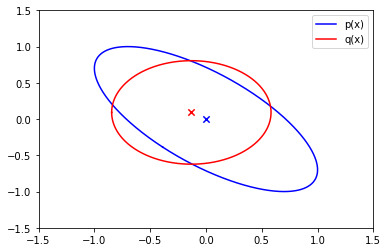

In [5]:
#繰り返し回数
m = 1

plt.xlim(ave_x - var_x * 1.5, ave_x + var_x * 1.5)
plt.ylim(ave_y - var_y * 1.5, ave_y + var_y * 1.5)
a_t,b_t,cos_t,sin_t = var_normal(var_x, var_y, var_xy)
x_t, y_t = graph_normal(ave_x, ave_y, a_t,b_t,cos_t,sin_t)
plt.plot(x_t , y_t , c='blue' ,label="p(x)")
plt.scatter(ave_x , ave_y ,  marker='x', s=40, c='blue')
x_v, y_v = graph_normal(x_lis[m], y_lis[m], varx_v,vary_v , 1 , 0)
plt.plot(x_v , y_v , c='red' ,label="q(x)")
plt.scatter(x_lis[m] , y_lis[m] ,  marker='x', s=40, c='red')
plt.legend()

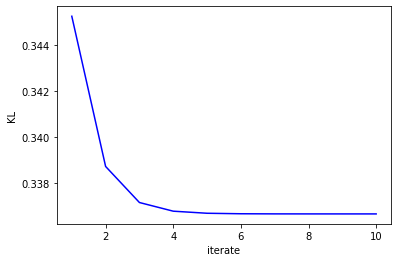

In [6]:
KL = (-np.log(varx_v) - np.log(vary_v) + (x_lis - ave_x) ** 2 / varx_v + (y_lis - ave_y) ** 2 / vary_v + np.log(det) ) / 2 - (x_lis - ave_x) * (y_lis - ave_y) * var_xy / det

x_dim = np.arange(1,n+1)

plt.xlabel("iterate")

plt.ylabel("KL")

plt.plot(x_dim , KL[1:] , c='blue')